In [2]:
########### more simple ver
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
def _draw_graph(fpr, tpr, auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.5f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [4]:
def get_auc(score, label, graph=True, fpr_tpr=False):
    fpr, tpr, thresholds = metrics.roc_curve(label, score)
    auc = metrics.auc(fpr, tpr)
    if graph == True: _draw_graph(fpr, tpr, auc)
    if fpr_tpr == False:
        return auc
    else:
        return auc, fpr, tpr        

In [5]:
def get_auc_from_normal_outlier(score_n, score_o, graph=True):
    label = [0]*len(score_n) + [1]*len(score_o)
    score = np.hstack((score_n, score_o))
    return get_auc(score, label, graph)

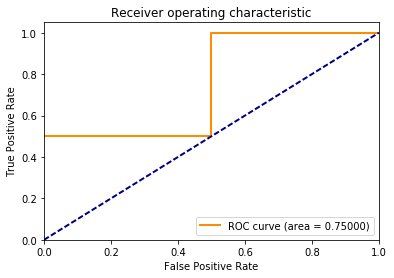

0.75

In [9]:
def sample00():
    y = np.array([0, 0, 1, 1])
    pred = np.array([0.1, 0.4, 0.35, 0.8])
    return get_auc(pred, y)
#sample00()

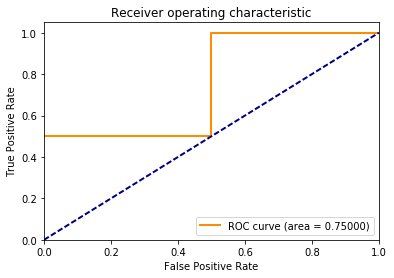

(0.75, array([ 0. ,  0.5,  0.5,  1. ]), array([ 0.5,  0.5,  1. ,  1. ]))

In [11]:
def sample01():
    y = np.array([0, 0, 1, 1])
    pred = np.array([0.1, 0.4, 0.35, 0.8])
    return get_auc(pred, y, fpr_tpr=True)
#sample01()